<a href="https://colab.research.google.com/github/Shivam0024/Coding_CPP/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
 %matplotlib inline

In [ ]:
import numpy as np


In [ ]:
(X_train, Y_train),(X_test, Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_test)

10000

In [ ]:
len(X_train)

60000

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train[0].shape

(28, 28)

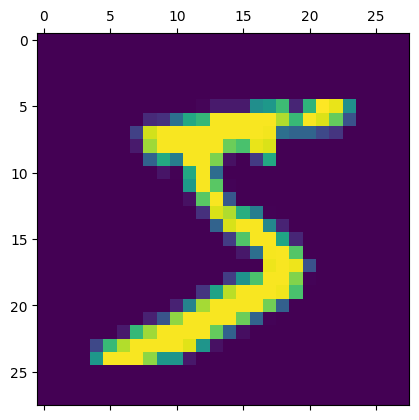

In [ ]:
plt.matshow(X_train[0])

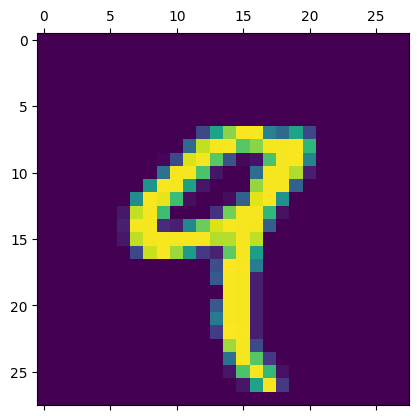

In [ ]:
plt.matshow(X_train[4])

In [ ]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape


(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_flattened, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4720 - accuracy: 0.8774
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9149
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9266
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9273
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9287
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2557 - accuracy: 0.9287
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2528 - accuracy: 0.9303
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2694 - accuracy: 0.9258


[0.26938238739967346, 0.9258000254631042]

In [ ]:
y=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y[0]

array([5.4678047e-04, 1.8856361e-09, 3.3622587e-03, 9.7632849e-01,
       9.1598113e-04, 1.1258289e-01, 1.4699948e-09, 9.9982291e-01,
       5.5462096e-02, 6.0902178e-01], dtype=float32)

In [ ]:
np.argmax(y[0])

7

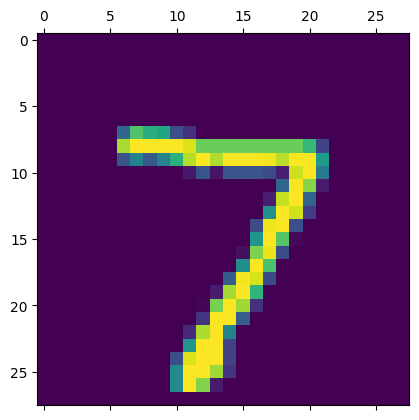

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y[2]

array([7.2202958e-05, 9.9538440e-01, 5.9841180e-01, 2.7192596e-01,
       1.4417765e-02, 1.1309658e-01, 1.1851024e-01, 1.3958553e-02,
       3.2407421e-01, 3.7339542e-02], dtype=float32)

In [ ]:
np.argmax(y[2])

1

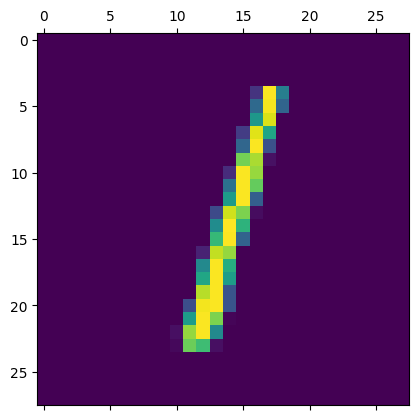

In [ ]:
plt.matshow(X_test[2])

In [ ]:
y_predicted=[np.argmax(i) for i in y]
y_predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [ ]:
tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    6,    9,    3,    1,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   4,   11,  918,   23,    7,    3,   10,   10,   41,    5],
       [   2,    0,   12,  946,    0,   13,    2,    9,   17,    9],
       [   1,    1,    6,    3,  909,    0,    7,    4,    7,   44],
       [   8,    2,    1,   48,    8,  758,   15,    7,   36,    9],
       [  10,    3,    9,    1,    7,   11,  913,    1,    3,    0],
       [   1,    6,   20,   11,    7,    1,    0,  935,    2,   45],
       [   5,   11,    5,   32,    9,   18,    9,    8,  862,   15],
       [  10,    8,    1,   12,   17,    3,    0,   13,    2,  943]],
      dtype=int32)>

In [ ]:
model=keras.Sequential([keras.layers.Dense(115,input_shape=(784,),activation='relu'),keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_flattened, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9240
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1214 - accuracy: 0.9647
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0831 - accuracy: 0.9748
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9805
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0384 - accuracy: 0.9880
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9897
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0218 - accuracy: 0.9931
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.017

In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9772


[0.09647366404533386, 0.9771999716758728]